In [1]:
import pandas as pd
import numpy as np
import joblib
from plotnine import *
from fbprophet import Prophet # conda install -c conda-forge prophet

Importing plotly failed. Interactive plots will not work.


In [ ]:
import ephem
import os
#default_loc=os.getcwd()
#os.chdir('/home/ubuntu/.local/lib/python3.6/site-packages')
#from prophet import Prophet
#os.chdir(default_loc)

# Data Loading

In [2]:
## Raw Data
df=joblib.load('/home/ubuntu/Python_Projects/Stock_Price_Prediction/data/stock_price_2020_2021.pkl')
print(df.shape)
print(df.Date.min(),df.Date.max())
print(df.REFRESH_DATE.min())
print(df.Stock.nunique())
print(df.dtypes)

(2178988, 9)
2020-01-02 00:00:00 2021-09-14 00:00:00
2021-08-15 00:00:00
5991
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
SE                      object
Stock                   object
REFRESH_DATE    datetime64[ns]
dtype: object


In [3]:
df.head(5)

,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
0,2020-01-02,1.35,1.38,1.35,1.35,4300.0,NASDAQ,AACG,2021-08-15
1,2020-01-03,1.36,1.49,1.36,1.47,42000.0,NASDAQ,AACG,2021-08-15
2,2020-01-06,1.51,1.51,1.36,1.43,18700.0,NASDAQ,AACG,2021-08-15
3,2020-01-07,1.39,1.44,1.36,1.43,13700.0,NASDAQ,AACG,2021-08-15
4,2020-01-08,1.41,1.58,1.36,1.51,90900.0,NASDAQ,AACG,2021-08-15


# Initial Modeling 

## 01 LOGI 

### Data Review 

In [4]:
df_LOGI=df.loc[df.Stock=='LOGI',:].reset_index(drop=True)
print(df_LOGI.shape)
df_LOGI

(424, 9)


,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
0,2020-01-02,46.762743,47.108404,46.673859,47.078773,176400.0,NASDAQ,LOGI,2021-08-15 00:00:00
1,2020-01-03,46.644234,46.940512,46.446713,46.624481,254000.0,NASDAQ,LOGI,2021-08-15 00:00:00
2,2020-01-06,46.170185,46.644232,46.110928,46.594852,164200.0,NASDAQ,LOGI,2021-08-15 00:00:00
3,2020-01-07,46.822002,46.861507,46.604729,46.723244,95200.0,NASDAQ,LOGI,2021-08-15 00:00:00
4,2020-01-08,46.970143,47.207164,46.782497,47.029396,142300.0,NASDAQ,LOGI,2021-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...
419,2021-08-31,103.620003,103.989998,102.019997,102.349998,88730000.0,NASDAQ,LOGI,2021-09-07 23:38:19
420,2021-09-01,103.440002,104.529999,103.129997,103.430000,59750000.0,NASDAQ,LOGI,2021-09-07 23:38:19
421,2021-09-02,102.919998,103.070000,101.089996,101.230003,61780000.0,NASDAQ,LOGI,2021-09-07 23:38:19
422,2021-09-03,102.870003,103.459999,102.470001,102.870003,46800000.0,NASDAQ,LOGI,2021-09-07 23:38:19


/home/ubuntu/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


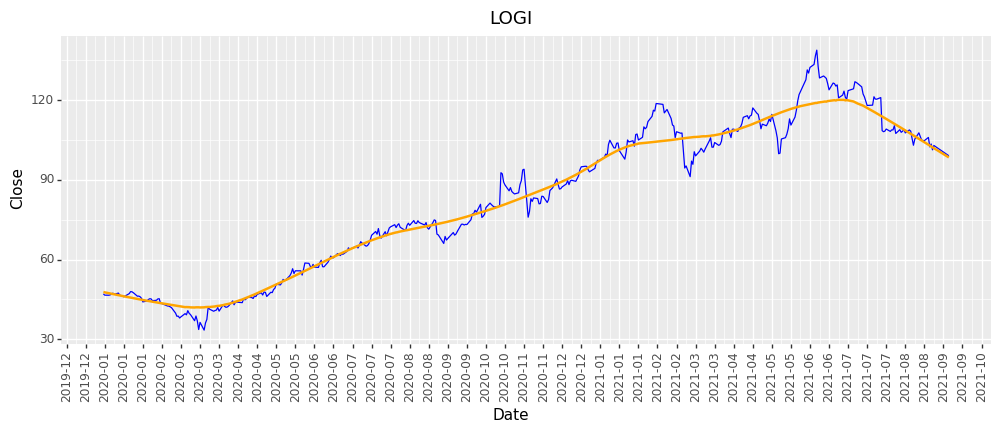

<ggplot: (8754096282017)>


In [5]:
## Viz
print(
    ggplot(aes('Date','Close'),df_LOGI)
    +geom_line(color='blue')
    +scale_x_datetime(date_breaks='14 days',date_labels='%Y-%m')
    +geom_smooth(span=0.2,color='orange',alpha=0.5)
    +labs(title='LOGI')
    +theme(axis_text_x=element_text(angle=90),figure_size=(12,4))
)

### Modeling 

In [5]:
df_LOGI_2=df_LOGI.loc[:,['Date','Close','Stock']].rename(columns={'Date':'ds',
                                                                  'Close':'y'
                                                                 })
df_LOGI_2 # til 9-14

,ds,y,Stock
0,2020-01-02,47.078773,LOGI
1,2020-01-03,46.624481,LOGI
2,2020-01-06,46.594852,LOGI
3,2020-01-07,46.723244,LOGI
4,2020-01-08,47.029396,LOGI
...,...,...,...
419,2021-08-31,102.349998,LOGI
420,2021-09-01,103.430000,LOGI
421,2021-09-02,101.230003,LOGI
422,2021-09-03,102.870003,LOGI


In [6]:
## Initializing
LOGI_m=Prophet()
LOGI_m.fit(df_LOGI_2)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
## Make future table
LOGI_Future=LOGI_m.make_future_dataframe(periods=60)
LOGI_Future.tail()

,ds
479,2021-11-09
480,2021-11-10
481,2021-11-11
482,2021-11-12
483,2021-11-13


In [8]:
## Predicting
forecast_LOGI=LOGI_m.predict(LOGI_Future)
forecast_LOGI

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,44.544732,36.391433,52.189113,44.544732,44.544732,-0.341792,-0.341792,-0.341792,-0.341792,-0.341792,-0.341792,0.0,0.0,0.0,44.202940
1,2020-01-03,44.526352,36.731131,51.679150,44.526352,44.526352,-0.291774,-0.291774,-0.291774,-0.291774,-0.291774,-0.291774,0.0,0.0,0.0,44.234578
2,2020-01-06,44.471211,36.060359,51.228120,44.471211,44.471211,-0.846190,-0.846190,-0.846190,-0.846190,-0.846190,-0.846190,0.0,0.0,0.0,43.625022
3,2020-01-07,44.452831,36.670441,51.129829,44.452831,44.452831,-0.590754,-0.590754,-0.590754,-0.590754,-0.590754,-0.590754,0.0,0.0,0.0,43.862077
4,2020-01-08,44.434451,36.888629,52.319135,44.434451,44.434451,-0.339704,-0.339704,-0.339704,-0.339704,-0.339704,-0.339704,0.0,0.0,0.0,44.094747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2021-11-09,111.531226,103.421726,119.415480,110.265746,112.853589,-0.590754,-0.590754,-0.590754,-0.590754,-0.590754,-0.590754,0.0,0.0,0.0,110.940472
480,2021-11-10,111.503067,103.342503,119.108518,110.177910,112.870289,-0.339704,-0.339704,-0.339704,-0.339704,-0.339704,-0.339704,0.0,0.0,0.0,111.163362
481,2021-11-11,111.474907,102.948822,118.735549,110.119207,112.882595,-0.341792,-0.341792,-0.341792,-0.341792,-0.341792,-0.341792,0.0,0.0,0.0,111.133115
482,2021-11-12,111.446748,103.336695,118.839022,110.052705,112.879500,-0.291774,-0.291774,-0.291774,-0.291774,-0.291774,-0.291774,0.0,0.0,0.0,111.154974


### Reviewing 

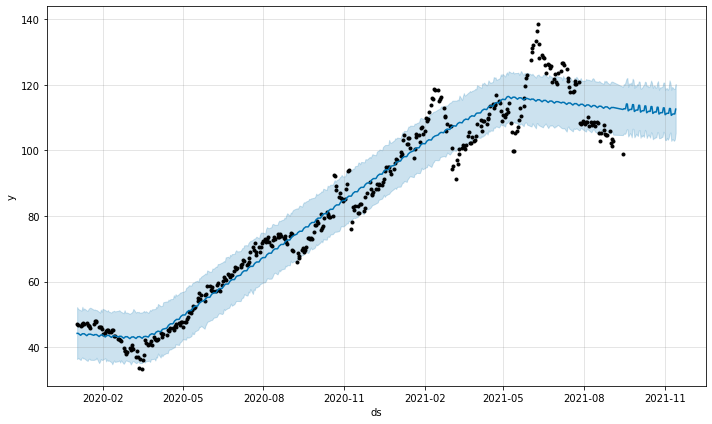

In [9]:
figi_LOGI=LOGI_m.plot(forecast_LOGI)

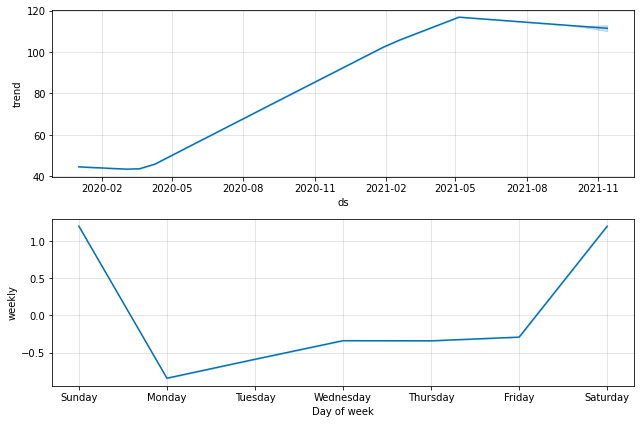

In [23]:
LOGI_fig_comps=LOGI_m.plot_components(forecast_LOGI)
# Friday seens to be higher

## 02 CRM 

### Data Review 

In [10]:
df_CRM=df.loc[df.Stock=='CRM',:].reset_index(drop=True)
print(df_CRM.shape)
df_CRM

(424, 9)


,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
0,2020-01-02,163.919998,167.070007,163.580002,166.990005,5189300.0,NYSE,CRM,2021-08-15 00:00:00
1,2020-01-03,165.059998,166.770004,165.000000,166.169998,3205400.0,NYSE,CRM,2021-08-15 00:00:00
2,2020-01-06,165.000000,173.669998,164.449997,173.449997,8836200.0,NYSE,CRM,2021-08-15 00:00:00
3,2020-01-07,173.229996,176.869995,172.089996,176.000000,8272700.0,NYSE,CRM,2021-08-15 00:00:00
4,2020-01-08,175.229996,178.850006,174.750000,177.330002,7225100.0,NYSE,CRM,2021-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...
419,2021-08-31,264.769989,266.769989,262.700012,265.269989,590000000.0,NYSE,CRM,2021-09-07 23:38:19
420,2021-09-01,266.269989,273.260010,265.589996,268.320007,718900000.0,NYSE,CRM,2021-09-07 23:38:19
421,2021-09-02,269.000000,269.260010,263.920013,264.149994,449960000.0,NYSE,CRM,2021-09-07 23:38:19
422,2021-09-03,263.600006,267.410004,261.799988,267.079987,735670000.0,NYSE,CRM,2021-09-07 23:38:19


/home/ubuntu/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


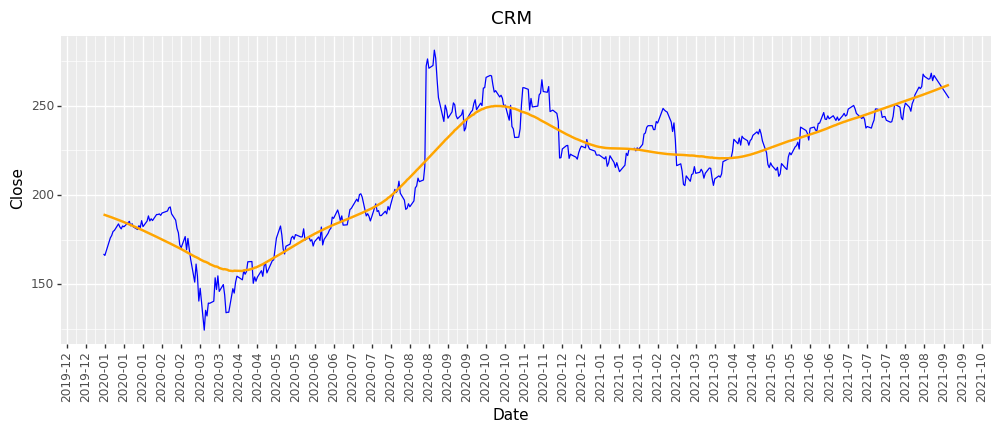

<ggplot: (8730837852257)>


In [27]:
## Viz
print(
    ggplot(aes('Date','Close'),df_CRM)
    +geom_line(color='blue')
    +scale_x_datetime(date_breaks='14 days',date_labels='%Y-%m')
    +geom_smooth(span=0.2,color='orange',alpha=0.5)
    +labs(title='CRM')
    +theme(axis_text_x=element_text(angle=90),figure_size=(12,4))
)

### Modeling 

In [12]:
df_CRM_2=df_CRM.loc[:,['Date','Close','Stock']].rename(columns={'Date':'ds',
                                                                'Close':'y'
                                                               })
df_CRM_2

,ds,y,Stock
0,2020-01-02,166.990005,CRM
1,2020-01-03,166.169998,CRM
2,2020-01-06,173.449997,CRM
3,2020-01-07,176.000000,CRM
4,2020-01-08,177.330002,CRM
...,...,...,...
419,2021-08-31,265.269989,CRM
420,2021-09-01,268.320007,CRM
421,2021-09-02,264.149994,CRM
422,2021-09-03,267.079987,CRM


In [18]:
## Initialzing
CRM_m=Prophet(daily_seasonality=False)
CRM_m.fit(df_CRM_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [19]:
## Make future table
CRM_future=CRM_m.make_future_dataframe(periods=60)
CRM_future.tail()

,ds
479,2021-11-09
480,2021-11-10
481,2021-11-11
482,2021-11-12
483,2021-11-13


In [20]:
## Predicting
CRM_forecast=CRM_m.predict(CRM_future)
CRM_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,181.505267,169.780525,200.367487,181.505267,181.505267,3.206872,3.206872,3.206872,3.206872,3.206872,3.206872,0.0,0.0,0.0,184.712140
1,2020-01-03,181.193816,169.394151,199.760597,181.193816,181.193816,3.374561,3.374561,3.374561,3.374561,3.374561,3.374561,0.0,0.0,0.0,184.568378
2,2020-01-06,180.259463,166.330706,198.525572,180.259463,180.259463,2.221091,2.221091,2.221091,2.221091,2.221091,2.221091,0.0,0.0,0.0,182.480555
3,2020-01-07,179.948012,167.663667,198.246562,179.948012,179.948012,2.998935,2.998935,2.998935,2.998935,2.998935,2.998935,0.0,0.0,0.0,182.946948
4,2020-01-08,179.636562,167.023071,198.460349,179.636562,179.636562,3.232050,3.232050,3.232050,3.232050,3.232050,3.232050,0.0,0.0,0.0,182.868612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2021-11-09,270.445728,254.999587,291.246326,263.739108,276.903095,2.998935,2.998935,2.998935,2.998935,2.998935,2.998935,0.0,0.0,0.0,273.444663
480,2021-11-10,270.695501,256.568778,291.823687,263.830771,277.345184,3.232050,3.232050,3.232050,3.232050,3.232050,3.232050,0.0,0.0,0.0,273.927551
481,2021-11-11,270.945274,256.496366,290.994862,263.785349,277.758368,3.206872,3.206872,3.206872,3.206872,3.206872,3.206872,0.0,0.0,0.0,274.152146
482,2021-11-12,271.195047,256.146207,291.932311,263.743466,278.254681,3.374561,3.374561,3.374561,3.374561,3.374561,3.374561,0.0,0.0,0.0,274.569608


### Reviewing 

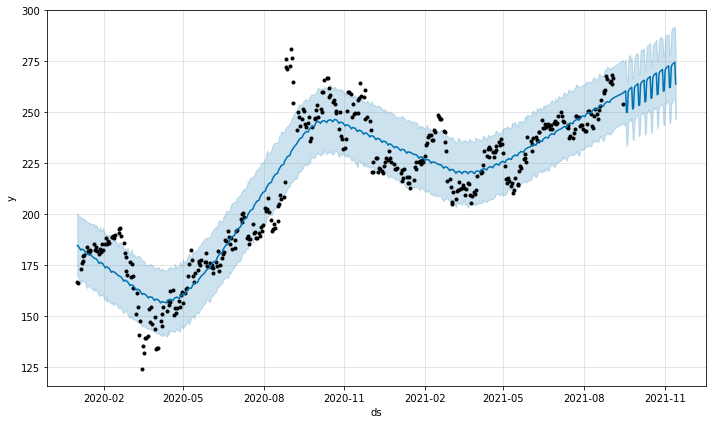

In [21]:
## Viz
CRM_fig=CRM_m.plot(CRM_forecast)

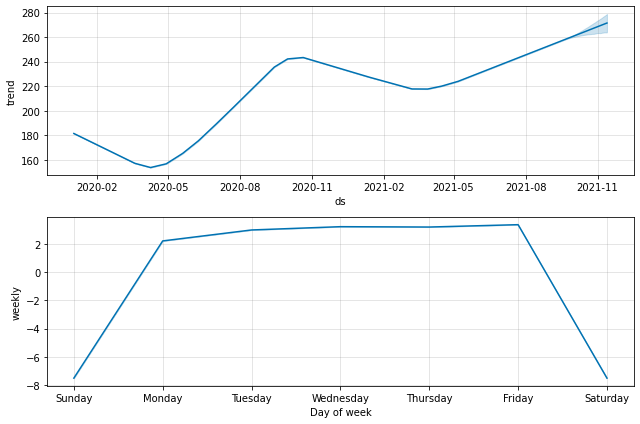

In [22]:
CRM_fig_comp=CRM_m.plot_components(CRM_forecast)
## Friday seems to be higher?

## 03  MSFT

### Data Review 

In [26]:
df_MSFT=df.loc[df.Stock=='MSFT',:].reset_index(drop=True)
print(df_MSFT.shape)
df_MSFT

(424, 9)


,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
0,2020-01-02,156.393425,158.314112,155.950192,158.205765,2.262210e+07,NASDAQ,MSFT,2021-08-15 00:00:00
1,2020-01-03,155.940346,157.545836,155.684244,156.235825,2.111620e+07,NASDAQ,MSFT,2021-08-15 00:00:00
2,2020-01-06,154.719007,156.708649,154.157567,156.639694,2.081370e+07,NASDAQ,MSFT,2021-08-15 00:00:00
3,2020-01-07,156.925308,157.270038,154.955370,155.211456,2.163410e+07,NASDAQ,MSFT,2021-08-15 00:00:00
4,2020-01-08,156.541163,158.383066,155.575897,157.683731,2.774650e+07,NASDAQ,MSFT,2021-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...
419,2021-08-31,304.420013,304.500000,301.500000,301.880005,2.625200e+09,NASDAQ,MSFT,2021-09-07 23:38:19
420,2021-09-01,302.869995,305.190002,301.489990,301.829987,1.898380e+09,NASDAQ,MSFT,2021-09-07 23:38:19
421,2021-09-02,302.200012,303.359985,300.179993,301.149994,1.629050e+09,NASDAQ,MSFT,2021-09-07 23:38:19
422,2021-09-03,300.989990,302.600006,300.260010,301.140015,1.474790e+09,NASDAQ,MSFT,2021-09-07 23:38:19


/home/ubuntu/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


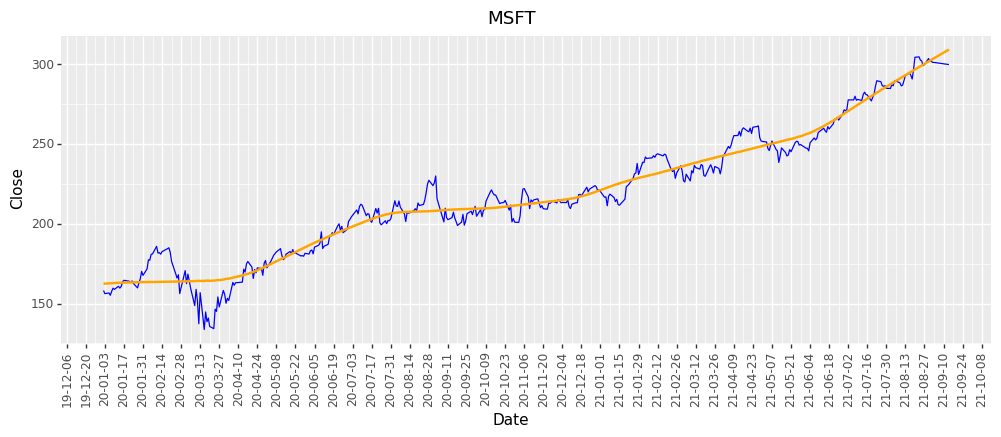

<ggplot: (8730820086453)>


In [30]:
## Viz
print(
    ggplot(aes('Date','Close'),df_MSFT)
    +geom_line(color='blue')
    +scale_x_datetime(date_breaks='14 days', date_labels='%y-%m-%d')
    +geom_smooth(span=0.2,color='orange',alpha=0.5)
    +labs(title='MSFT')
    +theme(axis_text_x=element_text(angle=90),figure_size=(12,4))

)

### Modeling 

In [31]:
## data reformating
df_MSFT_2=df_MSFT.loc[:,['Date','Close','Stock']].rename(columns={'Date':'ds',
                                                                  'Close':'y'
                                                                 })
df_MSFT_2

,ds,y,Stock
0,2020-01-02,158.205765,MSFT
1,2020-01-03,156.235825,MSFT
2,2020-01-06,156.639694,MSFT
3,2020-01-07,155.211456,MSFT
4,2020-01-08,157.683731,MSFT
...,...,...,...
419,2021-08-31,301.880005,MSFT
420,2021-09-01,301.829987,MSFT
421,2021-09-02,301.149994,MSFT
422,2021-09-03,301.140015,MSFT


In [32]:
## Initilizing
MSFT_m=Prophet(daily_seasonality=False)
MSFT_m.fit(df_MSFT_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [33]:
## Future data
MSFT_future=MSFT_m.make_future_dataframe(periods=60)
MSFT_future.tail()

,ds
479,2021-11-09
480,2021-11-10
481,2021-11-11
482,2021-11-12
483,2021-11-13


In [35]:
## Predicting
MSFT_forecast=MSFT_m.predict(MSFT_future)
MSFT_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,164.955219,156.974601,176.261829,164.955219,164.955219,1.413489,1.413489,1.413489,1.413489,1.413489,1.413489,0.0,0.0,0.0,166.368709
1,2020-01-03,164.878373,156.825416,176.541189,164.878373,164.878373,1.514192,1.514192,1.514192,1.514192,1.514192,1.514192,0.0,0.0,0.0,166.392565
2,2020-01-06,164.647834,156.255568,175.882629,164.647834,164.647834,1.276639,1.276639,1.276639,1.276639,1.276639,1.276639,0.0,0.0,0.0,165.924473
3,2020-01-07,164.570988,155.722155,175.474485,164.570988,164.570988,1.380979,1.380979,1.380979,1.380979,1.380979,1.380979,0.0,0.0,0.0,165.951967
4,2020-01-08,164.494142,156.319808,175.722161,164.494142,164.494142,1.512190,1.512190,1.512190,1.512190,1.512190,1.512190,0.0,0.0,0.0,166.006332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2021-11-09,326.204597,316.961941,338.403340,322.665713,330.270802,1.380979,1.380979,1.380979,1.380979,1.380979,1.380979,0.0,0.0,0.0,327.585576
480,2021-11-10,326.624492,317.302029,338.644276,323.013828,330.861937,1.512190,1.512190,1.512190,1.512190,1.512190,1.512190,0.0,0.0,0.0,328.136682
481,2021-11-11,327.044387,317.477677,339.194450,323.361163,331.421018,1.413489,1.413489,1.413489,1.413489,1.413489,1.413489,0.0,0.0,0.0,328.457876
482,2021-11-12,327.464282,319.078675,340.260365,323.664690,331.989132,1.514192,1.514192,1.514192,1.514192,1.514192,1.514192,0.0,0.0,0.0,328.978474


### Review 

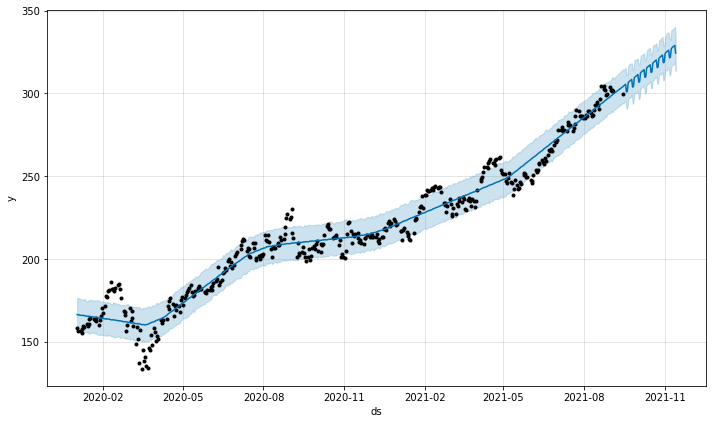

In [36]:
MSFT_fig=MSFT_m.plot(MSFT_forecast)

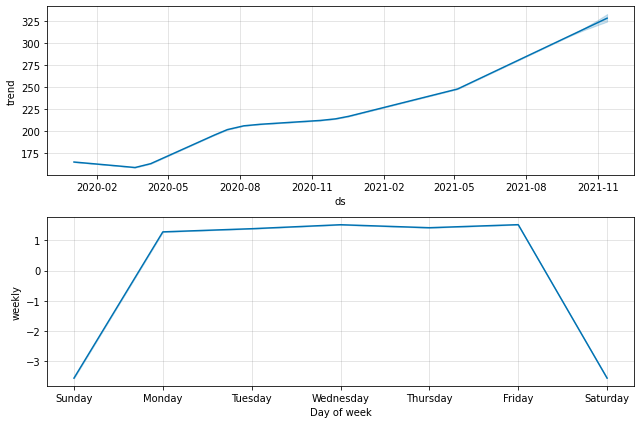

In [37]:
MSFT_fig_comps=MSFT_m.plot_components(MSFT_forecast)